<a href="https://colab.research.google.com/github/shubh-mishra/Tensorflow-Developer-Certificate-ZTM/blob/main/01_neural_network_regression_with_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Regression with Neural Networks in Tensorflow

In [ ]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.8.0


## Creating data to view and fit

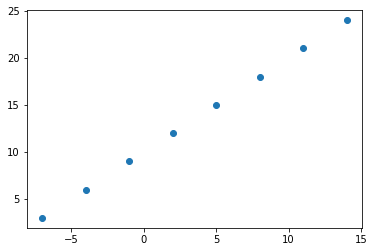

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Create features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])

# Visualize 
plt.scatter(X, y)

In [ ]:
y == X + 10

array([ True,  True,  True,  True,  True,  True,  True,  True])

## Input and Output shapes

In [ ]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(["bedroom", "bathroom", "garage"])
house_price = tf.constant([939700])
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(1,), dtype=int32, numpy=array([939700], dtype=int32)>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

((), ())

In [ ]:
# Turn our NumPy arrays to tensors
X = tf.constant(X)
y = tf.constant(y)
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

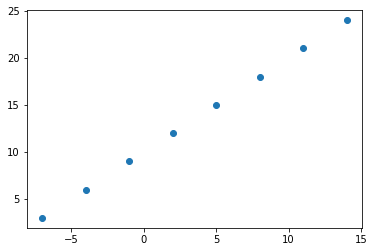

In [ ]:
plt.scatter(X, y)

## Steps in modelling with tensorflow

1. **Createing a model** - define the input and output layer, hidden layer of DL model.
2. **Compiling a model** - define loss function, optimizer and evaluation metrics.
3. **Fitting the model** - find patterns between X and y

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create a model using sequential API
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)                         
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer = tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 530ms/step - loss: 11.5048 - mae: 11.5048
Epoch 2/5
1/1 [==============================] - 0s 8ms/step - loss: 11.3723 - mae: 11.3723
Epoch 3/5
1/1 [==============================] - 0s 9ms/step - loss: 11.2398 - mae: 11.2398
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 11.1073 - mae: 11.1073
Epoch 5/5
1/1 [==============================] - 0s 13ms/step - loss: 10.9748 - mae: 10.9748


In [ ]:
# Check out X and y
X, y, X.ndim, y.ndim

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>,
 1,
 1)

In [ ]:
# Try and make a prediction using our model
y_pred = model.predict([17.0])
y_pred

array([[12.716021]], dtype=float32)

## Improving our model

In [ ]:
# Rebuilding our model

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Complite the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"]
              )

# 3. Fit the model
model.fit(tf.expand_dims(X, axis=-1), y, epochs = 100)

Epoch 1/100
1/1 [==============================] - 0s 336ms/step - loss: 11.2219 - mae: 11.2219
Epoch 2/100
1/1 [==============================] - 0s 8ms/step - loss: 11.0894 - mae: 11.0894
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 10.9569 - mae: 10.9569
Epoch 4/100
1/1 [==============================] - 0s 9ms/step - loss: 10.8244 - mae: 10.8244
Epoch 5/100
1/1 [==============================] - 0s 8ms/step - loss: 10.6919 - mae: 10.6919
Epoch 6/100
1/1 [==============================] - 0s 6ms/step - loss: 10.5594 - mae: 10.5594
Epoch 7/100
1/1 [==============================] - 0s 9ms/step - loss: 10.4269 - mae: 10.4269
Epoch 8/100
1/1 [==============================] - 0s 7ms/step - loss: 10.2944 - mae: 10.2944
Epoch 9/100
1/1 [==============================] - 0s 7ms/step - loss: 10.1619 - mae: 10.1619
Epoch 10/100
1/1 [==============================] - 0s 7ms/step - loss: 10.0294 - mae: 10.0294
Epoch 11/100
1/1 [==============================] - 0s 13

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Prediction
y_pred = model.predict([17.0])
y_pred

array([[29.739855]], dtype=float32)

In [ ]:
# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.Adam(lr=0.01),
              metrics=["mae"])

# 3. Fit
model.fit(tf.expand_dims(X, axis=-1), y, epochs=100)

Epoch 1/100


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1/1 [==============================] - 0s 408ms/step - loss: 12.3193 - mae: 12.3193
Epoch 2/100
1/1 [==============================] - 0s 7ms/step - loss: 11.5062 - mae: 11.5062
Epoch 3/100
1/1 [==============================] - 0s 6ms/step - loss: 10.6739 - mae: 10.6739
Epoch 4/100
1/1 [==============================] - 0s 8ms/step - loss: 9.8419 - mae: 9.8419
Epoch 5/100
1/1 [==============================] - 0s 13ms/step - loss: 8.9962 - mae: 8.9962
Epoch 6/100
1/1 [==============================] - 0s 8ms/step - loss: 8.1347 - mae: 8.1347
Epoch 7/100
1/1 [==============================] - 0s 7ms/step - loss: 7.4053 - mae: 7.4053
Epoch 8/100
1/1 [==============================] - 0s 6ms/step - loss: 6.6763 - mae: 6.6763
Epoch 9/100
1/1 [==============================] - 0s 9ms/step - loss: 5.9141 - mae: 5.9141
Epoch 10/100
1/1 [==============================] - 0s 10ms/step - loss: 5.1125 - mae: 5.1125
Epoch 11/100
1/1 [==============================] - 0s 10ms/step - loss: 4.2653 -

In [ ]:
X, y

(<tf.Tensor: shape=(8,), dtype=float64, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.])>,
 <tf.Tensor: shape=(8,), dtype=float64, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.])>)

In [ ]:
# Predict
model.predict([17.0])

array([[27.159163]], dtype=float32)

## Evaluating a model

"Visualise, Visualise, Visualise"
* The data 
* The model itself
* The training of the model
* The prediction of the model

In [ ]:
# Make a bigger dataset
X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [ ]:
# Make labels for the dataset
y=X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

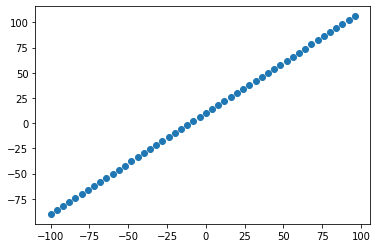

In [ ]:
# Visualize the data
import matplotlib.pyplot as plt
plt.scatter(X, y)

### The 3 sets of data ( The 3 datasets)

* Training set
* Validation set
* Test set

In [ ]:
# Check the lenght of samples
len(X)

50

In [ ]:
# Split the data into train and test sets
X_train = X[:40]
y_train = y[:40]

X_test = X[40:]
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

### Visualizing the data

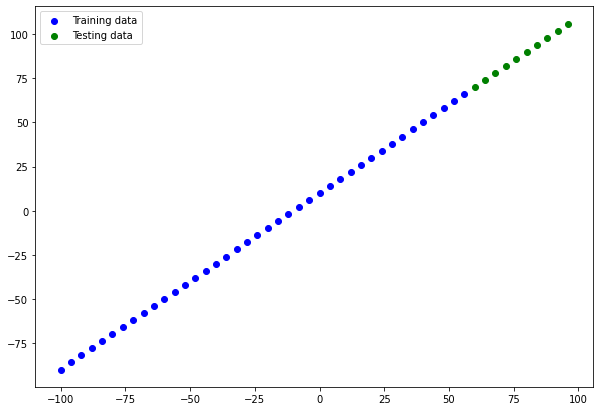

In [ ]:
plt.figure(figsize=(10, 7))
# Plot the training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
# Plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing data")
# Show a legend
plt.legend()

In [ ]:
# Create a model which build automatically by defining input shape of the data
tf.random.set_seed(42)

# 1. Create the model
model = tf.keras.Sequential([
  tf.keras.layers.Dense(10, input_shape=[1], name="input_layer"),
  tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

In [ ]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model
* Trainable params - these are the params the model can update as it trains
* Non-trainable params - these params aren't updated during training

In [ ]:
# Fit our model to training data
model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

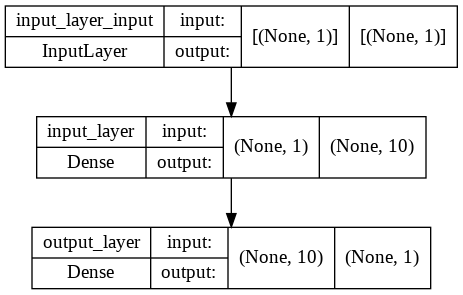

In [ ]:
from tensorflow.keras.utils import plot_model

plot_model(model = model, show_shapes=True)

### Visualizing our model's predictions

In [ ]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

In [ ]:
# Create a plotting function
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=y_pred):
  plt.figure(figsize=(10, 7))
  # Plot training data in blue
  plt.scatter(train_data, train_labels, c='b', label="Training data")
  # Plot testing data in green
  plt.scatter(test_data, test_labels, c='g', label="Testing data")
  # Plot model's predictions in red
  plt.scatter(test_data, predictions, c='r', label="Predictions")
  # Show the legend
  plt.legend();

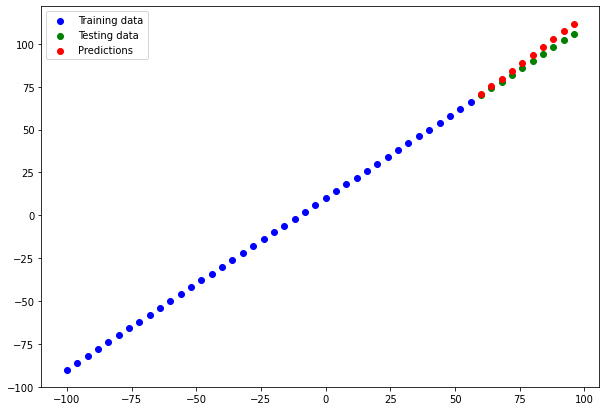

In [ ]:
plot_predictions()

### Evaluating our model's prediction with regression evaluation metrics

* MAE - Mean Absolute Error
* MSE - Mean Squared Error

In [ ]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 155ms/step - loss: 3.1969 - mae: 3.1969


[3.196942090988159, 3.196942090988159]

In [ ]:
y_pred

array([[ 70.55218 ],
       [ 75.13991 ],
       [ 79.72763 ],
       [ 84.31535 ],
       [ 88.903076],
       [ 93.49081 ],
       [ 98.07853 ],
       [102.66625 ],
       [107.253975],
       [111.8417  ]], dtype=float32)

In [ ]:
# Checking the shape of y_test, y_pred
y_test.shape, y_pred.shape

(TensorShape([10]), (10, 1))

In [ ]:
# Squeezing y_pred to match the shape of the tensors
y_test.shape, tf.squeeze(y_pred).shape

(TensorShape([10]), TensorShape([10]))

In [ ]:
# Calculate the MAE
tf.keras.losses.MAE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=3.1969407>

In [ ]:
# Calculate the MSE
tf.keras.losses.MSE(y_test, tf.squeeze(y_pred))

<tf.Tensor: shape=(), dtype=float32, numpy=13.070143>

In [ ]:
# Make some function to reuse MAE and MSE
def mae(y_true, y_pred):
  return tf.metrics.mean_absolute_error(y_true=y_true,
                                         y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
  return tf.metrics.mean_squared_error(y_true=y_true,
                                        y_pred=tf.squeeze(y_pred))


### Running experiments to improve our model

1. Get more data
2. Make your model larger (complex)
3. Train for longer

In [ ]:
X_train, y_train

(<tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
         -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
         -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
          32,   36,   40,   44,   48,   52,   56], dtype=int32)>,
 <tf.Tensor: shape=(40,), dtype=int32, numpy=
 array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
        -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
         14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
         66], dtype=int32)>)

**Build `model_1`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.mae,
              optimizer=tf.keras.optimizers.SGD(),
              metrics=["mae"])

# 3. Fit the model
model_1.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 15.9024 - mae: 15.9024
Epoch 2/100
2/2 [==============================] - 0s 4ms/step - loss: 11.2837 - mae: 11.2837
Epoch 3/100
2/2 [==============================] - 0s 4ms/step - loss: 11.1074 - mae: 11.1074
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 9.2991 - mae: 9.2991
Epoch 5/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1677 - mae: 10.1677
Epoch 6/100
2/2 [==============================] - 0s 7ms/step - loss: 9.4303 - mae: 9.4303
Epoch 7/100
2/2 [==============================] - 0s 11ms/step - loss: 8.5704 - mae: 8.5704
Epoch 8/100
2/2 [==============================] - 0s 5ms/step - loss: 9.0442 - mae: 9.0442
Epoch 9/100
2/2 [==============================] - 0s 6ms/step - loss: 18.7517 - mae: 18.7517
Epoch 10/100
2/2 [==============================] - 0s 4ms/step - loss: 10.1142 - mae: 10.1142
Epoch 11/100
2/2 [==============================] - 0s 5ms/step - 

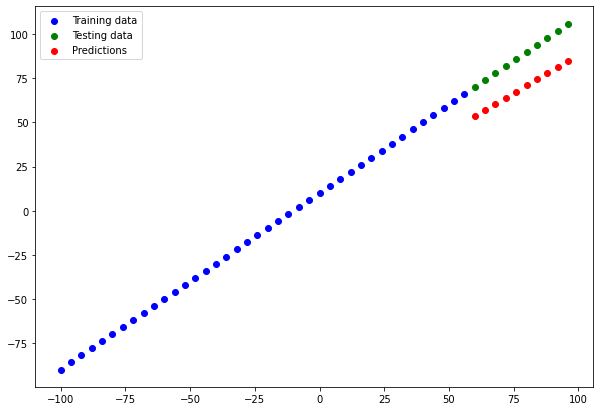

In [ ]:
# Make and plot predictions for model_1
y_preds_1 = model_1.predict(X_test)
plot_predictions(predictions=y_preds_1)

In [ ]:
# Calculating model_1 evaluation metrics
mae_1 = mae(y_test, y_preds_1)
mse_1 = mse(y_test, y_preds_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.745327>,
 <tf.Tensor: shape=(), dtype=float32, numpy=353.57336>)

**Build `model_2`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 7ms/step - loss: 37.5163 - mae: 37.5163
Epoch 2/100
2/2 [==============================] - 0s 8ms/step - loss: 15.3674 - mae: 15.3674
Epoch 3/100
2/2 [==============================] - 0s 6ms/step - loss: 11.0486 - mae: 11.0486
Epoch 4/100
2/2 [==============================] - 0s 5ms/step - loss: 8.4438 - mae: 8.4438
Epoch 5/100
2/2 [==============================] - 0s 9ms/step - loss: 9.1493 - mae: 9.1493
Epoch 6/100
2/2 [==============================] - 0s 5ms/step - loss: 9.1722 - mae: 9.1722
Epoch 7/100
2/2 [==============================] - 0s 3ms/step - loss: 10.8420 - mae: 10.8420
Epoch 8/100
2/2 [==============================] - 0s 6ms/step - loss: 14.4265 - mae: 14.4265
Epoch 9/100
2/2 [==============================] - 0s 9ms/step - loss: 22.3205 - mae: 22.3205
Epoch 10/100
2/2 [==============================] - 0s 6ms/step - loss: 11.4851 - mae: 11.4851
Epoch 11/100
2/2 [==============================] - 0s 5ms/step -

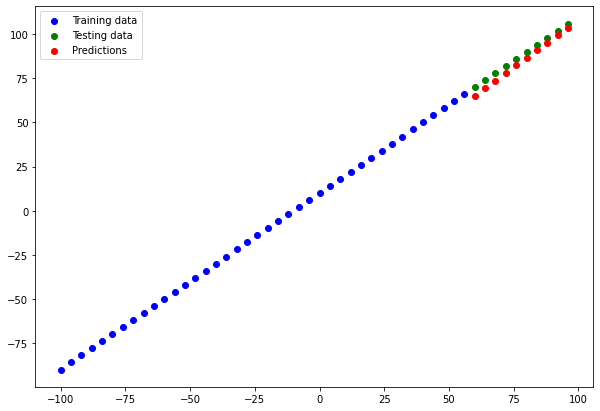

In [ ]:
# Make and plot predictions
y_preds_2 = model_2.predict(X_test)
plot_predictions(predictions=y_preds_2)

In [ ]:
# Calculating model_2 evaluating metrics
mae_2 = mae(y_test, y_preds_2)
mse_2 = mse(y_test, y_preds_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=3.5793502>,
 <tf.Tensor: shape=(), dtype=float32, numpy=13.51737>)

**Build `model_3`**

In [ ]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100, activation="relu"),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.mae,
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["mae"])

# 3. Fit the model
model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=500, verbose=0)

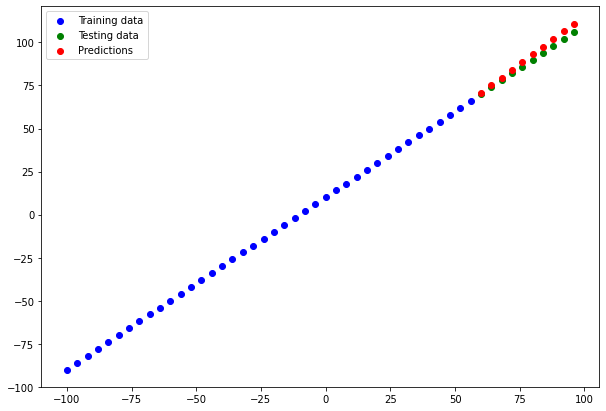

In [ ]:
# Make and plot predictions
y_preds_3 = model_3.predict(X_test)
plot_predictions(predictions=y_preds_3)

In [ ]:
# Calculating model_3 evaluation metrics
mae_3 = mae(y_test, y_preds_3)
mse_3 = mse(y_test, y_preds_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=2.8091965>,
 <tf.Tensor: shape=(), dtype=float32, numpy=9.771904>)

## Comparing the results of our experiments

In [ ]:
# Comparing models using pandas DataFrame
import pandas as pd

model_results = [["model_1", mae_1.numpy(), mse_1.numpy()],
                 ["model_2", mae_2.numpy(), mse_2.numpy()],
                 ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(data=model_results, columns=["model", "MAE", "MSE"])
all_results

,model,MAE,MSE
0,model_1,18.745327,353.573364
1,model_2,3.579350,13.517370
2,model_3,2.809196,9.771904


In [ ]:
# model_3 performed the best
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


## Tracking your experiments

* TensorBoard
* Weights and Biases

## Saving our models

Two formats:
1. The SavedModel format
2. The HDF5 format

In [ ]:
# Save model using SavedModel format
model_3.save("Model_3_SavedModel")

INFO:tensorflow:Assets written to: Model_3_SavedModel/assets


In [ ]:
# Save model using HDF5 format
model_3.save("Model_3_HDF5.h5")

## Loading in a saved model

In [ ]:
# Loading in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model("Model_3_SavedModel")
loaded_SavedModel_format.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model_3.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compare model_3 predictions with SavedModel format model predictions
model_3_preds = model_3.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)
model_3_preds == loaded_SavedModel_format_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [ ]:
# Load in a model using HDF5 format
loaded_h5_model = tf.keras.models.load_model("Model_3_HDF5.h5")
loaded_h5_model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               200       
                                                                 
 dense_8 (Dense)             (None, 1)                 101       
                                                                 
Total params: 301
Trainable params: 301
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Comapring model_3 predictions with h5 format model predictions
model_3_preds = model_3.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_3_preds == loaded_h5_model_preds

array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## Download a modell or any other file from Google Colab

1. Files > Download
2. Write below code

In [ ]:
# Download a file from Google Colab
from google.colab import files
#files.download("/content/Model_3_HDF5.h5") #Commented this line to avoid multiple downloads

## A larger example

In [ ]:
# Import required libraries
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# Read in the insurance dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# One-hot encode our dataframe
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [ ]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop(['charges'], axis=1)
y = insurance_one_hot['charges']

In [ ]:
# View X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [ ]:
# View y
y.head().to_frame()

,charges
0,16884.92400
1,1725.55230
2,4449.46200
3,21984.47061
4,3866.85520


In [ ]:
# create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(X_train), len(X_test)

(1338, 1070, 268)

In [ ]:
# Build a neural network

# Set random seed
tf.random.set_seed(42)

# 1. Create a model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                        optimizer=tf.keras.optimizers.SGD(),
                        metrics=["mae"])

# 3. Fit the model
insurance_model.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 2ms/step - loss: 13235.9590 - mae: 13235.9590
Epoch 2/100
34/34 [==============================] - 0s 2ms/step - loss: 12311.1182 - mae: 12311.1182
Epoch 3/100
34/34 [==============================] - 0s 2ms/step - loss: 12173.6699 - mae: 12173.6699
Epoch 4/100
34/34 [==============================] - 0s 3ms/step - loss: 12099.2920 - mae: 12099.2920
Epoch 5/100
34/34 [==============================] - 0s 2ms/step - loss: 11985.4248 - mae: 11985.4248
Epoch 6/100
34/34 [==============================] - 0s 3ms/step - loss: 11799.9395 - mae: 11799.9395
Epoch 7/100
34/34 [==============================] - 0s 3ms/step - loss: 11476.8359 - mae: 11476.8359
Epoch 8/100
34/34 [==============================] - 0s 3ms/step - loss: 10967.0264 - mae: 10967.0264
Epoch 9/100
34/34 [==============================] - 0s 2ms/step - loss: 10350.2998 - mae: 10350.2998
Epoch 10/100
34/34 [==============================] - 0s 2ms/step - loss: 9702.670

In [ ]:
# Check the result of insurance model on test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8962.0615 - mae: 8962.0615


[8962.0615234375, 8962.0615234375]

In [ ]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364489)

### Improving the insurance_model

Two experiments:
1. Add extra layers with more hidden neurons
2. Train for longer (epochs)
3. Change optimizer and learning rate

In [ ]:
# Experiment 1

# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_2 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.SGD(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_2.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Check results of insurance_model_2
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 10049.8857 - mae: 10049.8857


[10049.8857421875, 10049.8857421875]

In [ ]:
# Experiment 2

# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
history = insurance_model_3.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=100, verbose=0)

In [ ]:
# Check results of insurance_model_3
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8627.9424 - mae: 8627.9424


[8627.9423828125, 8627.9423828125]

In [ ]:
# Experiment 3

# Set seed
tf.random.set_seed(42)

# 1. Create the model
insurance_model_4 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                          optimizer=tf.keras.optimizers.Adam(),
                          metrics=["mae"])

# 3. Fit the model
insurance_model_4.fit(tf.expand_dims(X_train, axis=-1), y_train, epochs=200, verbose=0)

In [ ]:
# Check results of insurance_model_4
insurance_model_4.evaluate(X_test, y_test)

9/9 [==============================] - 0s 2ms/step - loss: 8632.2910 - mae: 8632.2910


[8632.291015625, 8632.291015625]

Text(0.5, 0, 'epochs')

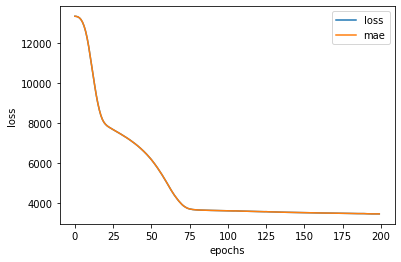

In [ ]:
# Plot history (also known as a loss curve or a traing curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

How long should we train for?
* EarlyStopping callback

## Preprocessing data (Normalization and Standardization)

In terms of scaling values, neural network tends to prefer Normalization

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
# Read in the insurance dataframe
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [ ]:
# import classes from scikit-learn
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

In [ ]:
# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]),
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = insurance.drop("charges", axis=1)
y = insurance["charges"]

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit our column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalizing (MinMaxScaler) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [ ]:
# Visualize and compare our data
X_train.loc[0], X_train_normal[0]

(age                19
 sex            female
 bmi              27.9
 children            0
 smoker            yes
 region      southwest
 Name: 0, dtype: object,
 array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
        1.        , 0.        , 0.        , 1.        , 0.        ,
        0.        ]))

In [ ]:
# Compare the shape of our datasets
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

## Build model with normalized data

In [ ]:
X_train.shape, y_train.shape

((1070, 6), (1070,))

In [ ]:
# Set seed

# 1. Create model
insurance_model = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# 2. Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=["mae"])

# 3. Fit the model
history = insurance_model.fit(X_train_normal, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 4ms/step - loss: 13343.7939 - mae: 13343.7939
Epoch 2/200
34/34 [==============================] - 0s 3ms/step - loss: 13334.0840 - mae: 13334.0840
Epoch 3/200
34/34 [==============================] - 0s 3ms/step - loss: 13310.1885 - mae: 13310.1885
Epoch 4/200
34/34 [==============================] - 0s 3ms/step - loss: 13260.8457 - mae: 13260.8457
Epoch 5/200
34/34 [==============================] - 0s 3ms/step - loss: 13174.9561 - mae: 13174.9561
Epoch 6/200
34/34 [==============================] - 0s 3ms/step - loss: 13041.3369 - mae: 13041.3369
Epoch 7/200
34/34 [==============================] - 0s 4ms/step - loss: 12849.4795 - mae: 12849.4795
Epoch 8/200
34/34 [==============================] - 0s 3ms/step - loss: 12589.2686 - mae: 12589.2686
Epoch 9/200
34/34 [==============================] - 0s 4ms/step - loss: 12251.7686 - mae: 12251.7686
Epoch 10/200
34/34 [==============================] - 0s 4ms/step - loss: 11833.07

In [ ]:
# insurance_model summary
insurance_model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 100)               1200      
                                                                 
 dense_22 (Dense)            (None, 10)                1010      
                                                                 
 dense_23 (Dense)            (None, 1)                 11        
                                                                 
Total params: 2,221
Trainable params: 2,221
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 4. Evaluate the model
insurance_model.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 3ms/step - loss: 3164.7930 - mae: 3164.7930


[3164.79296875, 3164.79296875]

Text(0.5, 0, 'epochs')

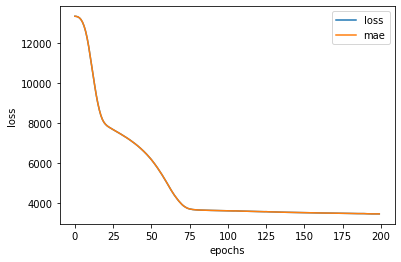

In [ ]:
# Plot history (also known as a loss curve or a traing curve)
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")